# Image Processing Pipeline

Complete pipeline for facial image processing, augmentation, and feature extraction


In [1]:
# Install required packages if not already installed
# Run this cell first if you get ModuleNotFoundError
import sys
import subprocess

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--break-system-packages", package])

# List of required packages
required_packages = [
    "opencv-python",
    "numpy",
    "pandas",
    "matplotlib",
    "Pillow",
    "scikit-image",
    "scikit-learn"
]

# Check and install missing packages
missing_packages = []
for package in required_packages:
    try:
        pkg_name = package.replace("-", "_") if "-" in package else package
        __import__(pkg_name)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"✗ {package} is missing - installing...")
        missing_packages.append(package)

if missing_packages:
    print(f"\nInstalling {len(missing_packages)} missing packages...")
    for package in missing_packages:
        try:
            install_package(package)
            print(f"✓ Successfully installed {package}")
        except Exception as e:
            print(f"✗ Failed to install {package}: {e}")
    print("\n✓ Installation complete! Please restart the kernel and run cells again.")
else:
    print("\n✓ All required packages are installed!")


✗ opencv-python is missing - installing...
✓ numpy is already installed
✓ pandas is already installed
✓ matplotlib is already installed
✗ Pillow is missing - installing...
✗ scikit-image is missing - installing...
✗ scikit-learn is missing - installing...

Installing 4 missing packages...
  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.5 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]
✓ Successfully installed opencv-python
✓ Successfully installed Pillow
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 5.7 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.0 MB/s  0:00:

In [2]:
# Import the necessary libraries
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Configuration - Updated for local project structure
BASE_DIR = Path("Images")
AUG_DIR = BASE_DIR / "augmented"

# Create directories if they don't exist
BASE_DIR.mkdir(parents=True, exist_ok=True)
AUG_DIR.mkdir(parents=True, exist_ok=True)

# Define team members
team_members = ['Phinah', 'Sage', 'Ayomide', 'Carine']
expressions = ['neutral', 'smile', 'surprised']

# List available image files
image_files = []
for member in team_members:
    for expr in expressions:
        img_path = BASE_DIR / f"{member}_{expr}.jpg"
        if img_path.exists():
            image_files.append(img_path)

print(f"Found {len(image_files)} image files in {BASE_DIR}")
for img in image_files[:6]:  # Show first 6
    print(f"  - {img.name}")


Found 12 image files in Images
  - Phinah_neutral.jpg
  - Phinah_smile.jpg
  - Phinah_surprised.jpg
  - Sage_neutral.jpg
  - Sage_smile.jpg
  - Sage_surprised.jpg


## Image Loading and Display


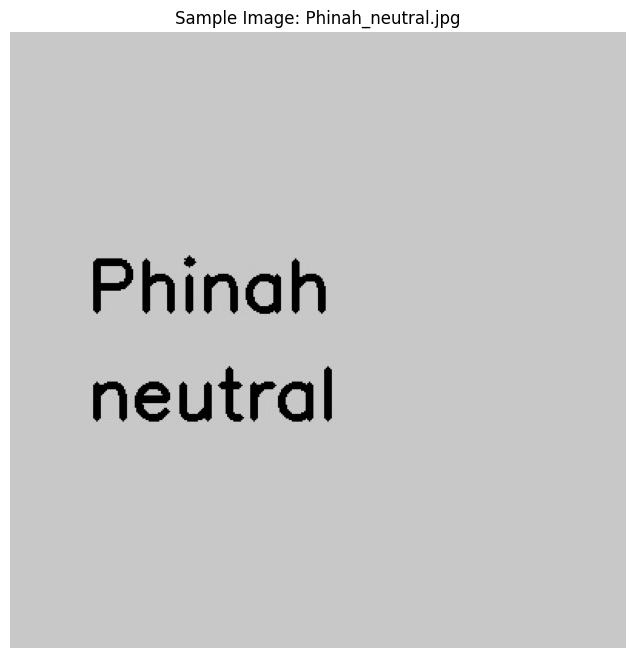

Image shape: (400, 400, 3)


In [4]:
# Load and display a sample image
def load_image(image_path):
    """Load image from file"""
    img = cv2.imread(str(image_path))
    if img is None:
        raise ValueError(f"Could not load image: {image_path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Example: Load Phinah's neutral image
sample_path = BASE_DIR / "Phinah_neutral.jpg"
if sample_path.exists():
    img = load_image(sample_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f"Sample Image: {sample_path.name}")
    plt.axis('off')
    plt.show()
    print(f"Image shape: {img.shape}")
else:
    print(f"Sample image not found: {sample_path}")


## Image Augmentation


In [5]:
# Augmentation functions

def augment_rotation(image, angle=15):
    """Rotate image by specified angle"""
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (width, height))
    return rotated

def augment_flip(image, flip_code=1):
    """Flip image (0=vertical, 1=horizontal, -1=both)"""
    return cv2.flip(image, flip_code)

def augment_grayscale(image):
    """Convert to grayscale"""
    if len(image.shape) == 3:
        return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

def augment_brightness(image, factor=1.5):
    """Adjust brightness"""
    bright = image.astype(np.float32) * factor
    bright = np.clip(bright, 0, 255).astype(np.uint8)
    return bright

def augment_noise(image, noise_level=25):
    """Add noise to image"""
    noise = np.random.randint(-noise_level, noise_level, image.shape, dtype=np.int16)
    noisy = image.astype(np.int16) + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

print("✓ Augmentation functions defined")


✓ Augmentation functions defined


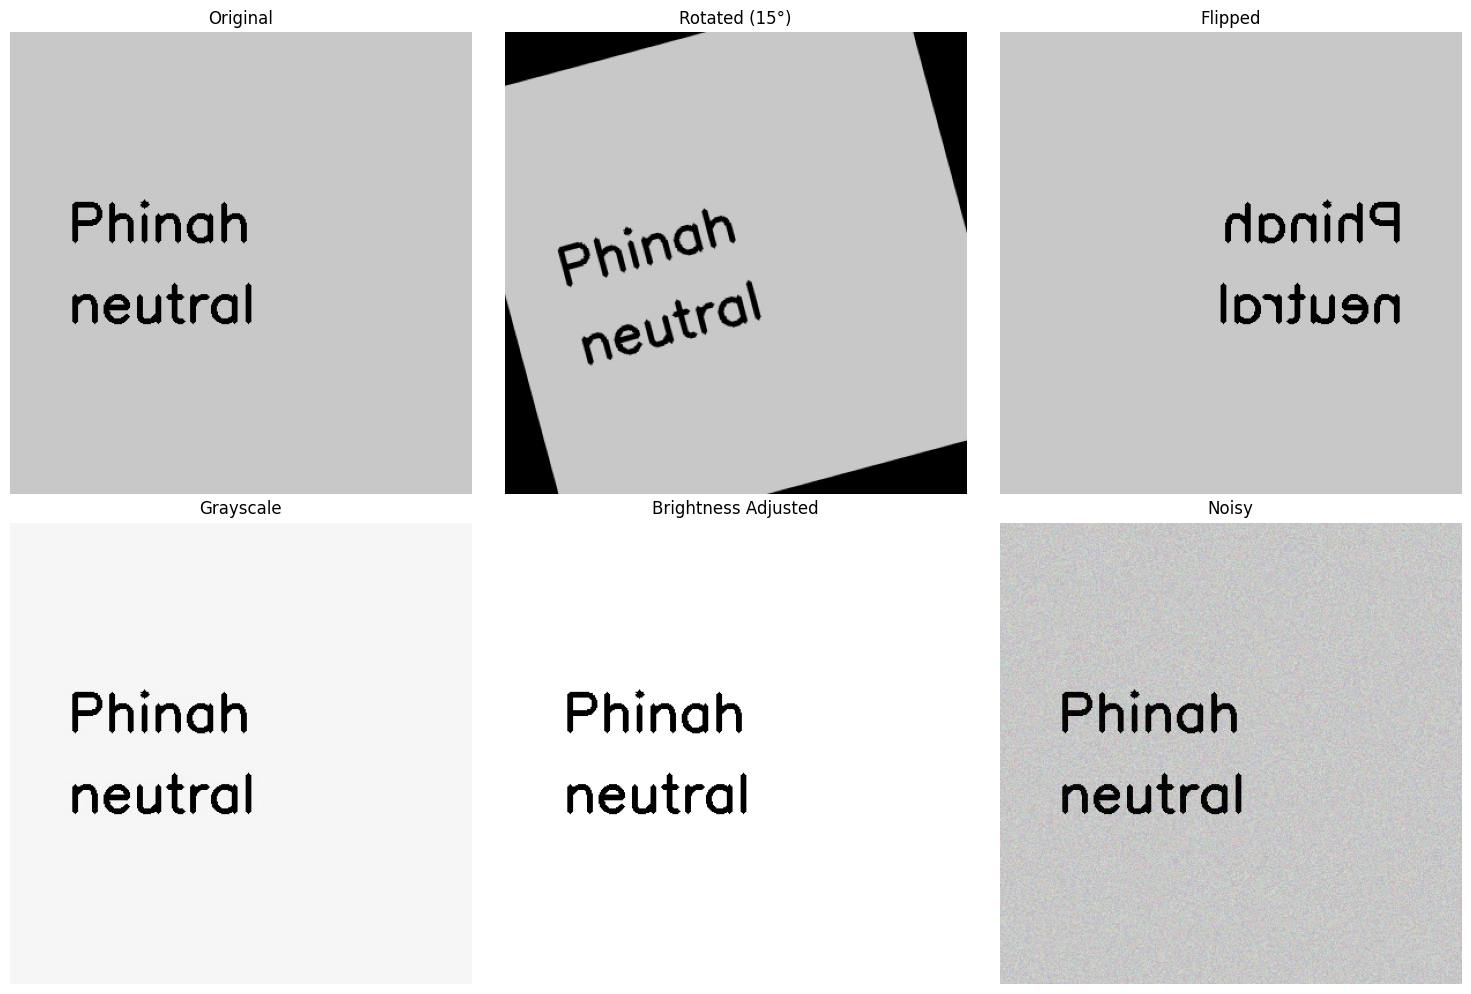

Display saved as 'sample_images_display.png'


In [6]:
# Apply augmentations to a sample image
sample_path = BASE_DIR / "Phinah_neutral.jpg"
if sample_path.exists():
    original = load_image(sample_path)
    
    # Apply augmentations
    rotated = augment_rotation(original, angle=15)
    flipped = augment_flip(original)
    grayscale = augment_grayscale(original)
    bright = augment_brightness(original, factor=1.3)
    noisy = augment_noise(original, noise_level=20)
    
    # Display all versions
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes[0, 0].imshow(original)
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(rotated)
    axes[0, 1].set_title('Rotated (15°)')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(flipped)
    axes[0, 2].set_title('Flipped')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(grayscale, cmap='gray')
    axes[1, 0].set_title('Grayscale')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(bright)
    axes[1, 1].set_title('Brightness Adjusted')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(noisy)
    axes[1, 2].set_title('Noisy')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_images_display.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("Display saved as 'sample_images_display.png'")


## Feature Extraction


In [7]:
# Feature extraction functions
from skimage.feature import hog, local_binary_pattern

def extract_histogram_features(image):
    """Extract histogram features for each channel"""
    if len(image.shape) == 2:
        # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        return hist.flatten()
    else:
        # Color image - extract for each channel
        features = []
        for i in range(3):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            features.extend(hist.flatten())
        return np.array(features)

def extract_hog_features(image):
    """Extract HOG (Histogram of Oriented Gradients) features"""
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Resize to standard size for HOG
    gray_resized = cv2.resize(gray, (128, 128))
    
    # Extract HOG features
    features = hog(gray_resized, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), feature_vector=True)
    return features

def extract_lbp_features(image, radius=3, n_points=24):
    """Extract LBP (Local Binary Pattern) features"""
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Extract LBP
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    
    # Calculate histogram
    hist, _ = np.histogram(lbp.ravel(), bins=n_points + 2, range=(0, n_points + 2))
    hist = hist.astype(float)
    hist /= (hist.sum() + 1e-7)  # Normalize
    
    return hist

def extract_color_moments(image):
    """Extract color moments (mean, std, skewness) for each channel"""
    if len(image.shape) == 2:
        image = image[:, :, np.newaxis]
    
    features = []
    for i in range(3):
        channel = image[:, :, i].flatten()
        mean = np.mean(channel)
        std = np.std(channel)
        skewness = np.mean(((channel - mean) / (std + 1e-7)) ** 3)
        features.extend([mean, std, skewness])
    
    return np.array(features)

print("✓ Feature extraction functions defined")


✓ Feature extraction functions defined


In [8]:
# Extract features from a sample image
sample_path = BASE_DIR / "Phinah_neutral.jpg"
if sample_path.exists():
    img = load_image(sample_path)
    
    hist_features = extract_histogram_features(img)
    hog_features = extract_hog_features(img)
    lbp_features = extract_lbp_features(img)
    color_moments = extract_color_moments(img)
    
    print(f"Histogram features: {len(hist_features)} dimensions")
    print(f"HOG features: {len(hog_features)} dimensions")
    print(f"LBP features: {len(lbp_features)} dimensions")
    print(f"Color moments: {len(color_moments)} dimensions")
    print(f"\nTotal features: {len(hist_features) + len(hog_features) + len(lbp_features) + len(color_moments)}")


Histogram features: 768 dimensions
HOG features: 8100 dimensions
LBP features: 26 dimensions
Color moments: 9 dimensions

Total features: 8903


## Process All Images and Extract Features


In [9]:
# Process all team member images
def process_member_images(member_name, expressions=['neutral', 'smile', 'surprised']):
    """Process all images for a team member"""
    features_list = []
    
    for expression in expressions:
        img_path = BASE_DIR / f"{member_name}_{expression}.jpg"
        
        if not img_path.exists():
            print(f"Warning: Image for {member_name} {expression} not found, skipping...")
            continue
        
        # Load original image
        original = load_image(img_path)
        
        # Apply augmentations
        rotated = augment_rotation(original, angle=15)
        flipped = augment_flip(original)
        grayscale = augment_grayscale(original)
        bright = augment_brightness(original, factor=1.3)
        noisy = augment_noise(original, noise_level=20)
        
        # Save augmented images
        aug_dir = AUG_DIR / member_name
        aug_dir.mkdir(parents=True, exist_ok=True)
        
        cv2.imwrite(str(aug_dir / f"{expression}_rotated.jpg"), 
                   cv2.cvtColor(rotated, cv2.COLOR_RGB2BGR))
        cv2.imwrite(str(aug_dir / f"{expression}_flipped.jpg"), 
                   cv2.cvtColor(flipped, cv2.COLOR_RGB2BGR))
        cv2.imwrite(str(aug_dir / f"{expression}_grayscale.jpg"), grayscale)
        cv2.imwrite(str(aug_dir / f"{expression}_bright.jpg"), 
                   cv2.cvtColor(bright, cv2.COLOR_RGB2BGR))
        cv2.imwrite(str(aug_dir / f"{expression}_noisy.jpg"), 
                   cv2.cvtColor(noisy, cv2.COLOR_RGB2BGR))
        
        # Process all versions (original + augmented)
        versions = [
            ('original', original),
            ('rotated', rotated),
            ('flipped', flipped),
            ('grayscale', cv2.cvtColor(grayscale, cv2.COLOR_GRAY2RGB) if len(grayscale.shape) == 2 else grayscale),
            ('bright', bright),
            ('noisy', noisy)
        ]
        
        for aug_type, img in versions:
            # Extract features
            hist_features = extract_histogram_features(img)
            hog_features = extract_hog_features(img)
            lbp_features = extract_lbp_features(img)
            color_moments = extract_color_moments(img)
            
            # Create feature dictionary
            feature_dict = {
                'member_name': member_name,
                'expression': expression,
                'augmentation': aug_type,
                'image_path': str(img_path)
            }
            
            # Add histogram features (reduced for CSV)
            hist_reduced = hist_features[::10]  # Sample every 10th value
            for i, val in enumerate(hist_reduced):
                feature_dict[f'hist_{i}'] = val
            
            # Add HOG features (reduced)
            hog_reduced = hog_features[::50]  # Sample every 50th value
            for i, val in enumerate(hog_reduced):
                feature_dict[f'hog_{i}'] = val
            
            # Add LBP features (reduced)
            lbp_reduced = lbp_features[::10]
            for i, val in enumerate(lbp_reduced):
                feature_dict[f'lbp_{i}'] = val
            
            # Add color moments
            for i, val in enumerate(color_moments):
                feature_dict[f'color_moment_{i}'] = val
            
            # Add mean and std intensity
            feature_dict['mean_intensity'] = np.mean(img)
            feature_dict['std_intensity'] = np.std(img)
            
            features_list.append(feature_dict)
    
    return features_list

print("✓ Processing function defined")


✓ Processing function defined


In [10]:
# Process all team members
print("="*60)
print("IMAGE PROCESSING PIPELINE")
print("="*60)

all_features = []
for member in team_members:
    print(f"\nProcessing images for {member}...")
    member_features = process_member_images(member)
    if member_features:
        all_features.extend(member_features)
        print(f"  ✓ Processed {len(member_features)} image versions")
    else:
        print(f"  ✗ No features extracted for {member}.")

if all_features:
    df_features = pd.DataFrame(all_features)
    df_features.to_csv('image_features.csv', index=False)
    
    print(f"\n{'='*60}")
    print(f"Feature extraction complete!")
    print(f"Total samples processed: {len(all_features)}")
    print(f"Features saved to: image_features.csv")
    print(f"Shape: {df_features.shape}")
    print(f"\nFeature columns: {len(df_features.columns)} total")
    print("="*60)
    
    # Display first few rows
    print("\nFirst few rows:")
    display(df_features.head())
else:
    print("No images were processed. Check your image directory and file names.")


IMAGE PROCESSING PIPELINE

Processing images for Phinah...
  ✓ Processed 18 image versions

Processing images for Sage...
  ✓ Processed 18 image versions

Processing images for Ayomide...
  ✓ Processed 18 image versions

Processing images for Carine...
  ✓ Processed 18 image versions

Feature extraction complete!
Total samples processed: 72
Features saved to: image_features.csv
Shape: (72, 257)

Feature columns: 257 total

First few rows:


,member_name,expression,augmentation,image_path,hist_0,hist_1,hist_2,hist_3,hist_4,hist_5,...,color_moment_1,color_moment_2,color_moment_3,color_moment_4,color_moment_5,color_moment_6,color_moment_7,color_moment_8,mean_intensity,std_intensity
0,Phinah,neutral,original,Images/Phinah_neutral.jpg,2751.0,0.0,0.0,0.0,0.0,0.0,...,30.039841,-6.332591,195.373100,30.039841,-6.332591,195.373100,30.039841,-6.332591,195.373100,30.039841
1,Phinah,neutral,rotated,Images/Phinah_neutral.jpg,17613.0,6.0,14.0,2.0,6.0,41.0,...,65.178714,-2.278384,175.169363,65.178714,-2.278384,175.169363,65.178714,-2.278384,175.169363,65.178714
2,Phinah,neutral,flipped,Images/Phinah_neutral.jpg,2751.0,0.0,0.0,0.0,0.0,0.0,...,30.039841,-6.332591,195.373100,30.039841,-6.332591,195.373100,30.039841,-6.332591,195.373100,30.039841
3,Phinah,neutral,grayscale,Images/Phinah_neutral.jpg,2751.0,0.0,0.0,0.0,0.0,0.0,...,30.039841,-6.332591,195.373100,30.039841,-6.332591,195.373100,30.039841,-6.332591,195.373100,30.039841
4,Phinah,neutral,bright,Images/Phinah_neutral.jpg,2751.0,1.0,0.0,0.0,0.0,0.0,...,38.314393,-6.333865,249.093006,38.314393,-6.333865,249.093006,38.314393,-6.333865,249.093006,38.314393


## Summary and Next Steps


In [11]:
# Summary
print("="*60)
print("PROCESSING SUMMARY")
print("="*60)
print(f"\nTeam members processed: {len(team_members)}")
print(f"Expressions per member: {len(expressions)}")
print(f"Augmentations per image: 5 (rotated, flipped, grayscale, bright, noisy)")
print(f"Total image versions: {len(all_features) if all_features else 0}")
print(f"\nOutput files:")
print(f"  - image_features.csv: Feature matrix")
print(f"  - Images/augmented/: Augmented images")
print(f"  - sample_images_display.png: Visualization")
print("\nNext steps:")
print("  1. Review image_features.csv")
print("  2. Train facial recognition model: python train_face_model.py")
print("  3. Test face verification: python verify_face.py Images/Phinah_neutral.jpg")


PROCESSING SUMMARY

Team members processed: 4
Expressions per member: 3
Augmentations per image: 5 (rotated, flipped, grayscale, bright, noisy)
Total image versions: 72

Output files:
  - image_features.csv: Feature matrix
  - Images/augmented/: Augmented images
  - sample_images_display.png: Visualization

Next steps:
  1. Review image_features.csv
  2. Train facial recognition model: python train_face_model.py
  3. Test face verification: python verify_face.py Images/Phinah_neutral.jpg
